# Assignment 1


You must submit your notebook by running `python3 -m autograder.run.submit Assignment1.ipynb` from your local repository.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. To do so, restart the kernel and run all cells (in the menubar, select Runtime→→Restart and run all).

#### Show your work!
Whenever you are asked to find the solution to a problem, be sure to also **show how you arrived** at your answer.

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWERS HERE", as well as your name below:


## Q1

<img src="images/asgn1%20q1%20fig.png" alt="assignment 1 question 1 figure" width="700"/>

Which solution would the following search algorithms find to move from node *Start* to node *Goal* if run the algorithm on the search graph above? Break any ties alphabetically. Please give each answer in a form similar to this example: `[start, 'a', 'd', goal]`

a. Breadth-First Search
    FIFO, alpahbetical 
    
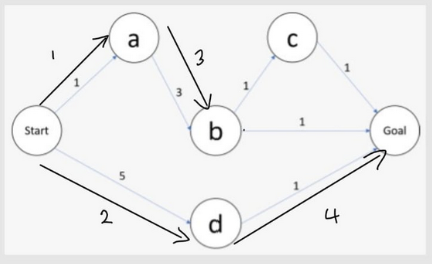

b. Depth-First Search
    LIFO 

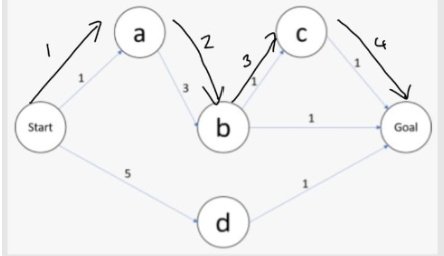

c. Uniform Cost Search

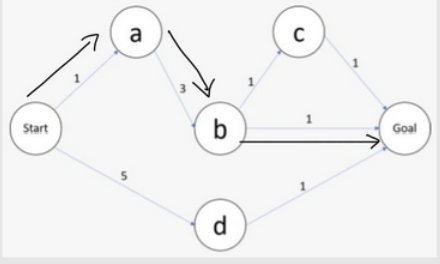

Explain by drawing an equivalent search tree for each of them. Draw the search trees graphically. A good way to do this is through [Google Drawings](https://docs.google.com/drawings)



In [10]:
# YOUR ANSWERS HERE
def question1():
    """
    Description:
    [Enter a description of your reasoning for each of a through c here.]

    reasoning for 
        a. Breadth-First Search : Finds the shallowest depth goal, so it will return the solution with the smallest number of edges regardless of cost. In this case that means start to d then to goal. 
        
        b. Depth-First Search : This goes down one branch as far as it can before backtracking, and will return the first one it finds. Alphabetically here it will open the a branch and follow all the way to the goal and return that.

        c. Uniform Cost Search: This will return the path with the lowest cost, here that is the toal of 5 from start,a,b,goal.


    """
    start = 'Start'
    goal = 'Goal'
    
    a = ['Start', 'd', 'Goal']
    b = ['Start', 'a', 'b', 'c', 'Goal']
    c = ['Start', 'a', 'b', 'Goal']
    
    return a, b, c

## Q2
Answer the following questions about the search problem shown in the figure below. Break any ties alphabetically. For the questions that ask for a path, please give your answers in a form similar to this example: `[start, 'a', 'd', goal]`. For questions `e` and `f`, please return either `True` or `False`.

Start − a − d − Goal

<img src="images/asgn1%20q2%20fig.png" alt="assignment 1 question 2 figure" width="700"/>

What path would be returned for this search problem using each of the following graph search algorithms?

a. Breadth-First Search

b. Uniform Cost Search

c. Depth-First Search

d. A* Search (using an appropriate heuristic function). Explain what heuristc function you used.



Consider the heuristics for this problem shown in the table below.

|     State     |     h1     |     h2        |
|---------------|------------|---------------|
|     start     |     5      |     4         |
|     a         |     3      |     2         |
|     b         |     6      |     6         |
|     c         |     2      |     1         |
|     d         |     3      |     3         |
|     goal      |     0      |     0         |


e. Is h1 consistent?

f. Is h2 consistent?

In [11]:
# YOUR ANSWERS HERE
def question2():
    """
    Description:
    [Enter a description of your reasoning for each of a through f here.]
    """
    start = 'Start'
    goal = 'Goal'
       
    a = [start, goal] 
    b = [start, 'a', 'c', goal]
    c = [start, 'a', 'b', 'd', goal]
    d = [start, 'a', 'c', goal]
    e = False
    f = False
    
    return a, b, c, d, e, f

## Chess 
The remaining questions in this assignment, as well as all the questions in the following assignment, will make use of Python's chess module.

If you're not familiar with this, it would probably be beneficial to spend some time going over it before getting started with the rest of the assignment. The official documentation is one place to get started: `https://python-chess.readthedocs.io/en/latest/`

## The Knight Errant Problem
The knight begins their quest in the bottom left-hand corner of the board, the tile 'A1'. Their quest will end when they reach the upper right-hand corner of the board, the tile 'H8'. Along the way, the knight will pass through many other tiles on the board. 

Below is a chess board with the columns being listed as letter a-h and the rows are numbers 1-8. This means that pieces along the first row would be A1, B1, C1, etc. 

![asgn1 knight errant fig1.png](<attachment:asgn1 knight errant fig1.png>)

The assignment specifically talks about having a knight (also known as the horsey) on A1. This means that we will start with the knight in the bottom left corner. The knight piece moves in an L shape. This means that we can either go to C2 or B3 from our starting position. 

![asgn1 knight errant fig2.png](<attachment:asgn1 knight errant fig2.png>)
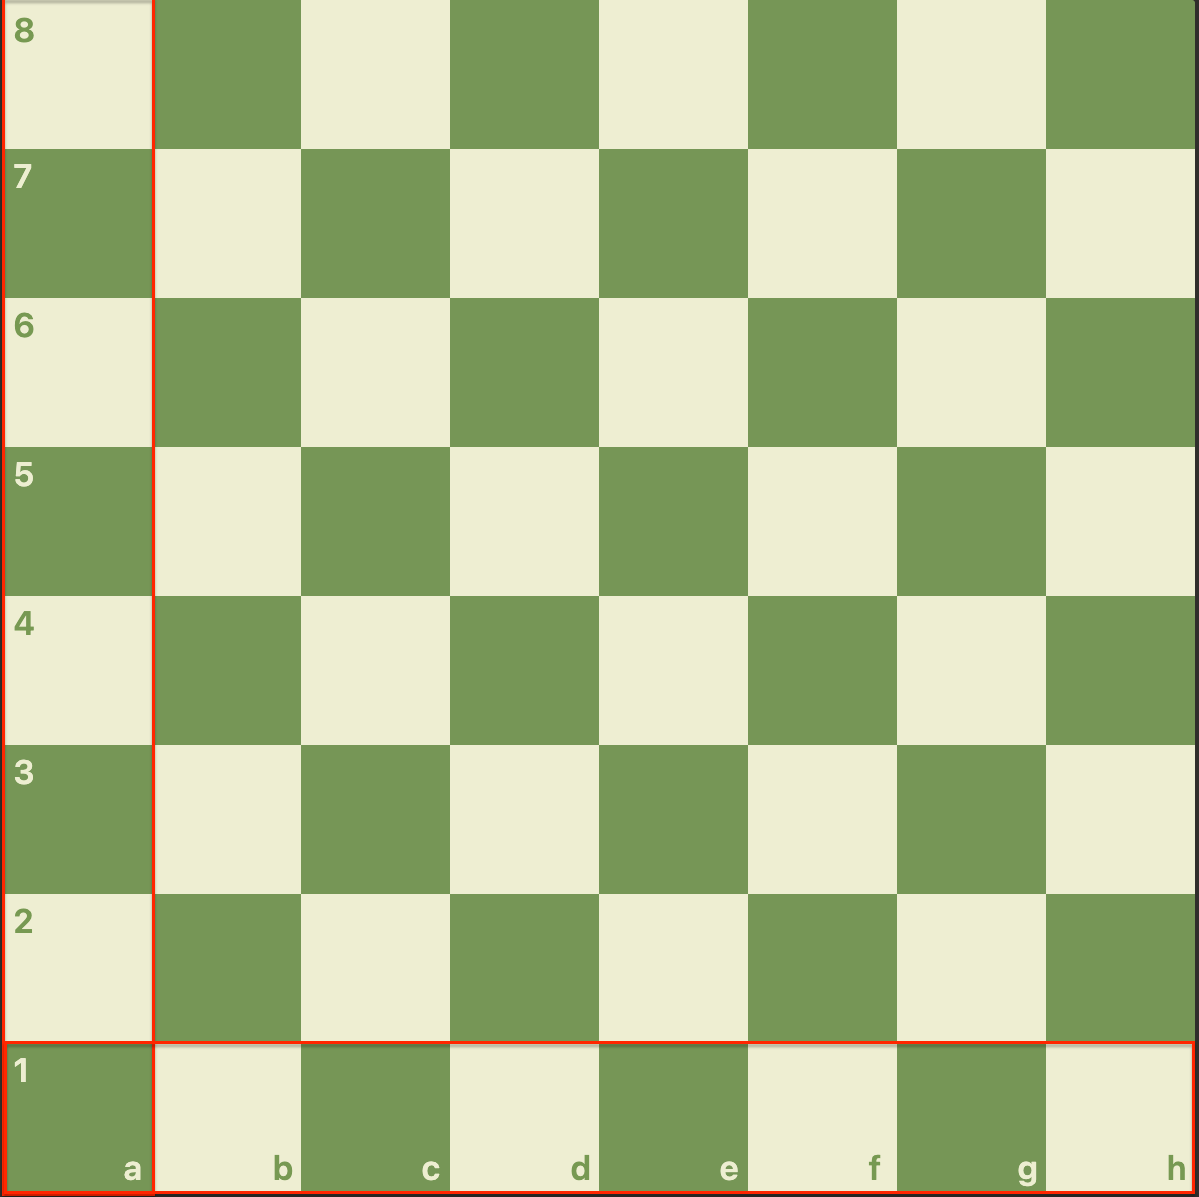
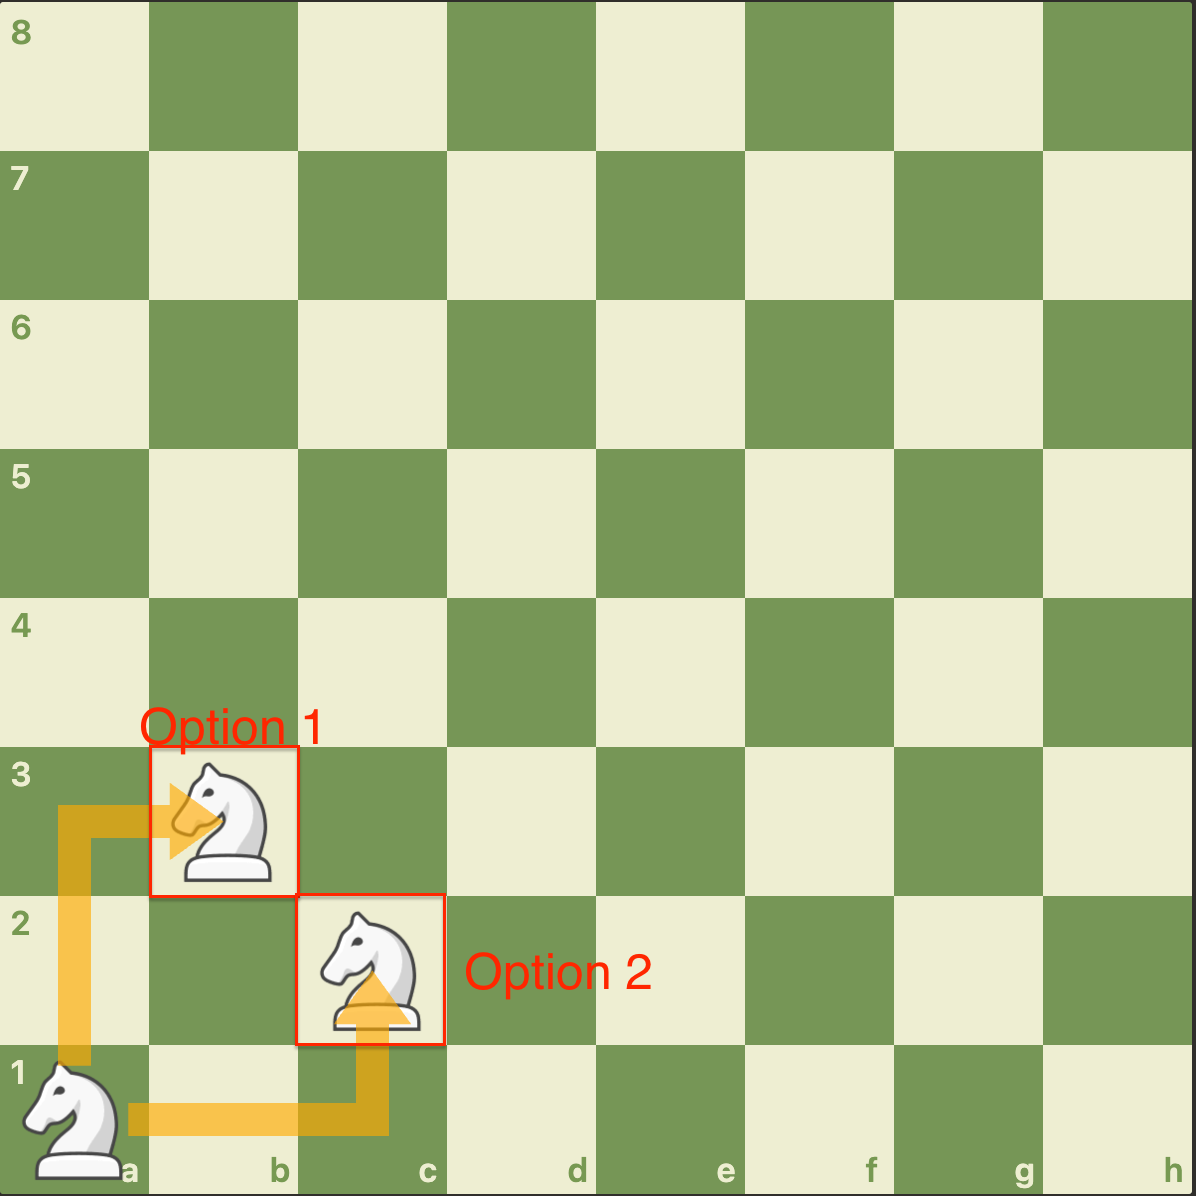

#### Implementation Guidance ####

For each of the following questions, implement the corresponding search algorithm and return the list of tiles visited, in order. In Python's chess module, each tile has an integer id corresponding to it, where `'A1' = 0`, `'A2' = 1`, etc, and they are really just treated as integers by the chess module. Each chess square is equivalent to a number ranging from `0` to `63`, going from left to right, one row at at a time.

For example, the knight starting on tile `'A1' = 0` and moving through tiles `'A1' = 0`, `'B3' = 17`, and `'D2' = 11`, in that order, before finally reaching the destination `'F1' = 5` would be represented by the list `[0, 17, 11, 5]`. Please note, this conversion from `A1` to `0` happens automatically, so please don't be confused if you added a chess tile to your list and saw it as an integer when you print it out; it is really the same thing.

Because there is no opponent here, so you will have to set the `board.turn` property after every turn and make it the turn of the first player again.

As one final piece of advice, it is not necessary to invent any grand new functions here to help you interface with the chess board. If you have an idea for something but it seems like a lot of work to implement on your own, there may very well be a built-in chess module function that can do it for you. Please have a look before diving in head-first.


A function to check whether a given board meets the goal condition is provided here for you below:

In [12]:
import chess

def goal_reached(board: chess.Board, goal_position: chess.Square):
    """
    This function informs us as to whether the goal condition has been met during our search

    Parameters:
    - board: the chess board that the knight is moving upon

    Returns:
    - True: if the knight is on the destination tile 'H8'
    - False: otherwise
    """
    p = board.piece_at(goal_position)
    return p and p.piece_type == chess.KNIGHT and p.color == chess.WHITE

## Q3
Implement the **Breadth-First Search** (BFS) algorithm to find the order of expanded tiles (not the final path) for the the Knight Errant Problem.

Break ties in the order given by `board.legal_moves`. Please give your answer in a form similar to this example: `[0, 31, 15, ..., 63]`

In [13]:
from collections import deque
def BFS(board: chess.Board, goal_position: chess.Square):
    """
    This function implements the breath first search algorithm
    
    Parameters:
    - board: the chess board that the knight is moving upon
    - goal_position: the id of the square the knight must reach
    
    Returns:
    A list containing the visited tile values in the order they were visited with starting tile
    always being the first tile and the goal tile always being the last tile
    """
    start_square = next(iter(board.pieces(chess.KNIGHT, chess.WHITE)))

    visited_order = []
    visited = set([start_square])
    queue = deque([start_square])

    while queue:
        current_square = queue.popleft()
        visited_order.append(current_square)

        if current_square == goal_position:
            break

        # Generate neighbors in legal-move order
        temp_board = board.copy(stack=False)
        temp_board.clear_board()
        temp_board.turn = chess.WHITE
        temp_board.set_piece_at(
            current_square,
            chess.Piece(chess.KNIGHT, chess.WHITE)
        )

        for move in temp_board.legal_moves:
            next_square = move.to_square
            if next_square not in visited:
                visited.add(next_square)
                queue.append(next_square)

    return visited_order

In [14]:
test_board = chess.Board("8/8/8/8/8/8/8/N7")
print(test_board)

test_goal = chess.C6
test_ans = [0, 17, 10, 34, 32, 27, 11, 2, 25, 20, 16, 4, 51, 49, 44, 40, 28, 24, 19, 42]
q3 = BFS(test_board, test_goal)

assert q3 == test_ans, (f"Failed for test case A1 to {test_goal}; expanded {q3}")
print("Found the expected path")

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
Found the expected path


## Q4
Implement the **Depth-First Search** (DFS) algorithm to find the order of expanded tiles (not the final path) for the the Knight Errant Problem.

Break ties in the order given by `board.legal_moves`. Please give your answer in a form similar to this example: `[0, 31, 15, ..., 63]`

In [15]:
def DFS(board: chess.Board, goal_position: chess.Square):
    """
    This function implements the depth first search algorithm
    
    Parameters:
    - board: the chess board that the knight is moving upon
    - goal_position: the id of the square the knight must reach
    
    Returns:
    A list containing the visited tile values in the order they were visited with starting tile
    always being the first tile and the goal tile always being the last tile
    """
   
    # YOUR CODE HERE
    start_square = next(iter(board.pieces(chess.KNIGHT, chess.WHITE)))

    visited_order = []
    visited = set()
    stack = [start_square]

    while stack:
        current = stack.pop()

        if current in visited:
            continue

        visited.add(current)
        visited_order.append(current)

        if current == goal_position:
            break

        temp_board = chess.Board.empty()
        temp_board.turn = chess.WHITE
        temp_board.set_piece_at(
            current,
            chess.Piece(chess.KNIGHT, chess.WHITE)
        )

        # Reverse so first legal move is explored first
        moves = list(temp_board.legal_moves)
        for move in reversed(moves):
            stack.append(move.to_square)

    return visited_order

In [16]:
test_board = chess.Board("8/8/8/8/8/8/8/N7")
print(test_board)

test_goal = chess.C6
test_ans = [0, 17, 34, 51, 61, 55, 45, 62, 52, 58, 48, 42]
q4 = DFS(test_board, test_goal)

assert q4 == test_ans, (f"Failed for test case A1 to {test_goal}; expanded = {q4}")
print("Found the expected path")

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
Found the expected path


## Q5
Implement the **A* Search** (Textbook Section 3.5.2) algorithm to find the **final path found** for the Knight Errant Problem.

#### A* Search
---
The most widely known form of best-first search is called **A∗ search** (pronounced "A-star search"). It evaluates nodes by combining $g(n)$, the cost to reach the node, and $h(n)$, the cost to get from the node to the goal:

\begin{equation*}
f(n) = g(n) + h(n) .
\end{equation*}

Since $g(n)$ gives the path cost from the start node to node $n$, and $h(n)$ is the estimated cost of the cheapest path from n to the goal, we have


$f(n)$= estimated cost of the cheapest solution through $n$ .

**NOTE:**
- If two positions are considered equally good choices, take the node that appears first in board.legal_moves
- You may also find the built-in function `chess.square_knight_distance(a, b)` useful here


In [17]:
import heapq

def a_star_search(board: chess.Board, goal_position: chess.Square):
    """
    This function implements the A* search algorithm

    Parameters:
    - board: the chess board that the knight is moving upon
    - goal_position: the id of the square the knight must reach

    Returns:
    A list containing the final path returned by A*, starting with the start tile's ID and ending with the goal tile's ID.
    """
    optimal_path = []

    start_square = next(iter(board.pieces(chess.KNIGHT, chess.WHITE)))

    frontier = []
    counter = 0
    heapq.heappush(frontier, (0, counter, 0, start_square))

    came_from = {start_square: None}
    g_cost = {start_square: 0}
    visited = set()

    while frontier:
        _, _, current_g, current = heapq.heappop(frontier)

        if current in visited:
            continue
        visited.add(current)

        if current == goal_position:
            break

        temp_board = chess.Board.empty()
        temp_board.turn = chess.WHITE
        temp_board.set_piece_at(
            current,
            chess.Piece(chess.KNIGHT, chess.WHITE)
        )

        for move in temp_board.legal_moves:
            next_square = move.to_square
            new_g = current_g + 1

            if next_square not in g_cost or new_g < g_cost[next_square]:
                g_cost[next_square] = new_g
                f = new_g + chess.square_knight_distance(next_square, goal_position)
                counter += 1
                heapq.heappush(frontier, (f, counter, new_g, next_square))
                came_from[next_square] = current

    # Reconstruct path
    node = goal_position
    while node is not None:
        optimal_path.append(node)
        node = came_from[node]

    optimal_path.reverse()
    return optimal_path

In [18]:
test_board = chess.Board("8/8/8/8/8/8/8/N7")
print(test_board)

test_goal = chess.C6
test_ans = [0, 17, 32, 42]
q5 = a_star_search(test_board, test_goal)

assert q5 == test_ans, (f"Failed for test case A1 to {test_goal}; expanded = {q5}")
print("Found the expected path")

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
Found the expected path
